In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
water2018 = gpd.read_file("zip://impaired_2018_lakes.zip")
water2016 = gpd.read_file("zip://impaired_2016_lakes.zip")
water2014 = gpd.read_file("zip://impaired_2014_lakes.zip")

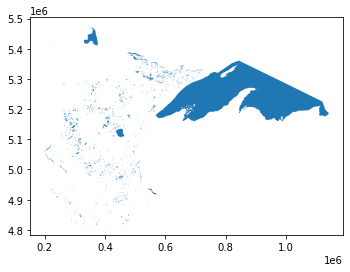

In [3]:
water2018.plot()

In [4]:
for col in water2018.columns:
    print(col)

AUID
CAT
CAT_DESC
NAME
REACH_DESC
USE_CLASS
AREA_ACRES
AFFECTED_U
LIKE_MEET
NON_POLL
NAT_BACK
ADD_MON
APPROVED
NEEDS_PLN
IMP_PARAM
NEW_IMPAIR
HUC_8
HUC_8_NAME
HUC_4
BASIN
COUNTY
TRIBAL_INT
INDIAN_RES
AMMONIA
CHLORIDE
FISHESBIO
HG_F
HG_W
NUTRIENTS
PCB_F
PFOS_F
Shape_Leng
Shape_Area
geometry


In [5]:
water2018 = water2018.drop(["CAT", "CAT_DESC", "REACH_DESC", "AREA_ACRES", "AFFECTED_U", "LIKE_MEET", "NON_POLL", 
                "NAT_BACK", "ADD_MON", "APPROVED", "NEEDS_PLN", "NEW_IMPAIR", "HUC_8", "HUC_8_NAME", "HUC_4", "BASIN", 
                "COUNTY", "TRIBAL_INT", "INDIAN_RES", "AMMONIA", "CHLORIDE", "FISHESBIO", "HG_F", "HG_W", 
                "NUTRIENTS", "PCB_F", "PFOS_F", "Shape_Leng", "Shape_Area"], axis = 1)


In [6]:
water2018

,AUID,NAME,USE_CLASS,IMP_PARAM,geometry
0,01-0001-00,Pine,"2B, 3C",Nutrients,"POLYGON ((492805.109 5113777.267, 492795.895 5..."
1,01-0014-00,Savanna,"2B, 3C",Nutrients,"POLYGON ((486012.720 5188792.470, 486029.333 5..."
2,01-0023-00,Round,"2B, 3C",Hg-F,"POLYGON ((485515.690 5170459.530, 485504.673 5..."
3,01-0033-00,Minnewawa,"2B, 3C",Hg-F; Nutrients,"MULTIPOLYGON (((480685.061 5174505.656, 480685..."
4,01-0034-00,Horseshoe,"2B, 3C",Nutrients,"POLYGON ((484457.916 5173749.489, 484467.761 5..."
...,...,...,...,...,...
1624,86-0297-00,Scott,"2B, 3C",Nutrients,"POLYGON ((401166.952 5014674.480, 401171.685 5..."
1625,86-0298-00,Union,"2B, 3C",Hg-F; Nutrients,"POLYGON ((400936.000 5011510.957, 400918.918 5..."
1626,87-0016-00,Curtis,"2B, 3C",Nutrients,"MULTIPOLYGON (((302563.741 4938794.870, 302573..."
1627,87-0030-00,Wood,"2B, 3C",Nutrients,"MULTIPOLYGON (((298889.583 4950213.050, 298872..."


In [7]:
for col in water2016.columns:
    print(col)

AUID
CAT
DATASET_NA
NAME
REACH_DESC
USE_CLASS
AREA_ACRES
AFFECTED_U
TMDL_NOT_R
TMDL_NOT_1
TMDL_APPRO
TMDL_APP_1
TMDL_NEEDE
TMDL_NEE_1
IMPAIR_PAR
IMPAIR_P_1
NEW_IMPAIR
NEW_IMPA_1
HUC_8
HUC_8_NAME
HUC_4
BASIN
COUNTY
TRIBAL_INT
INDIAN_RES
CHLORIDE
FISHESBIO
HG_F
HG_W
NUTRIENTS
PCB_F
PFOS_F
SHAPE_Leng
SHAPE_Area
geometry


In [8]:
water2016.drop(["CAT", "DATASET_NA", "REACH_DESC", "AREA_ACRES", "AFFECTED_U", "TMDL_NOT_R", "TMDL_NOT_1", "IMPAIR_P_1", "NEW_IMPAIR", "NEW_IMPA_1", 
                "TMDL_APPRO", "TMDL_APP_1", "TMDL_NEEDE", "TMDL_NEE_1", "HUC_8", "HUC_8_NAME", "HUC_4", 
                "BASIN", "COUNTY", "TRIBAL_INT", "INDIAN_RES", "CHLORIDE", "FISHESBIO", "HG_F", "HG_W", 
                "NUTRIENTS", "PCB_F", "PFOS_F", "SHAPE_Leng", "SHAPE_Area"], axis = 1)

,AUID,NAME,USE_CLASS,IMPAIR_PAR,geometry
0,01-0001-00,Pine,"2B, 3C",Nutrients,"POLYGON ((492805.109 5113777.267, 492795.895 5..."
1,01-0023-00,Round,"2B, 3C",Hg-F,"POLYGON ((486099.414 5170959.937, 486094.529 5..."
2,01-0033-00,Minnewawa,"2B, 3C",Hg-F; Nutrients,"MULTIPOLYGON (((480599.849 5174314.082, 480600..."
3,01-0034-00,Horseshoe,"2B, 3C",Nutrients,"POLYGON ((484457.916 5173749.489, 484467.761 5..."
4,01-0036-00,Wakefield,"2B, 3C",Hg-F,"POLYGON ((482121.518 5188839.830, 482142.037 5..."
...,...,...,...,...,...
1561,86-0297-00,Scott,"2B, 3C",Nutrients,"POLYGON ((401166.952 5014674.480, 401171.685 5..."
1562,86-0298-00,Union,"2B, 3C",Hg-F; Nutrients,"POLYGON ((400936.000 5011510.957, 400918.918 5..."
1563,87-0016-00,Curtis,"2B, 3C",Nutrients,"MULTIPOLYGON (((302563.741 4938794.870, 302573..."
1564,87-0030-00,Wood,"2B, 3C",Nutrients,"MULTIPOLYGON (((298889.583 4950213.050, 298872..."


In [9]:
for col in water2014.columns:
    print(col)

WATER_NAME
LOCATION
ACRES
AUID
CAT
AFFECTED_U
NOPLN
APPROVED
NEEDSPLN
IMPAIR_PAR
NEW_2014
HUC8
HUC8_NAME
HUC4
BASIN
ALL_COUNTI
WDWMO_NAME
WDWMO_TYPE
Chloride
HgF
HgW
Nutrients
PCBF
PFOS_W
SHAPE_Leng
Shape_Le_1
Shape_Area
geometry


In [10]:
water2014 = water2014.drop(["LOCATION", "ACRES", "CAT", "AFFECTED_U", "NOPLN", "APPROVED", "NEEDSPLN", "NEW_2014", 
                "HUC8", "HUC8_NAME", "HUC4", "BASIN", "ALL_COUNTI", "WDWMO_NAME", "WDWMO_TYPE", "Chloride", 
                "HgF", "HgW", "Nutrients", "PCBF", "PFOS_W", "SHAPE_Leng", "Shape_Le_1", "Shape_Area"], axis = 1)
water2014

,WATER_NAME,AUID,IMPAIR_PAR,geometry
0,Pine,01-0001-00,Nutrients,"POLYGON ((211234.589 733047.880, 211225.726 73..."
1,Round,01-0023-00,HgF,"POLYGON ((202993.714 793572.050, 202989.582 79..."
2,Minnewawa,01-0033-00,"HgF, Nutrients","MULTIPOLYGON (((197701.509 796964.802, 197701...."
3,Horseshoe,01-0034-00,Nutrients,"POLYGON ((201353.757 796483.558, 201363.215 79..."
4,Glacier,01-0042-00,HgF,"POLYGON ((199207.026 804352.767, 199203.204 80..."
...,...,...,...,...
1538,Scott,86-0297-00,Nutrients,"POLYGON ((128398.800 624801.488, 128403.464 62..."
1539,Union,86-0298-00,"HgF, Nutrients","POLYGON ((128289.879 621431.128, 128274.020 62..."
1540,Curtis,87-0016-00,Nutrients,"MULTIPOLYGON (((38328.831 540625.558, 38338.05..."
1541,Wood,87-0030-00,Nutrients,"MULTIPOLYGON (((34483.752 552622.791, 34467.78..."


In [11]:
water2014.rename(columns = {"WATER_NAME" : "NAME"})

,NAME,AUID,IMPAIR_PAR,geometry
0,Pine,01-0001-00,Nutrients,"POLYGON ((211234.589 733047.880, 211225.726 73..."
1,Round,01-0023-00,HgF,"POLYGON ((202993.714 793572.050, 202989.582 79..."
2,Minnewawa,01-0033-00,"HgF, Nutrients","MULTIPOLYGON (((197701.509 796964.802, 197701...."
3,Horseshoe,01-0034-00,Nutrients,"POLYGON ((201353.757 796483.558, 201363.215 79..."
4,Glacier,01-0042-00,HgF,"POLYGON ((199207.026 804352.767, 199203.204 80..."
...,...,...,...,...
1538,Scott,86-0297-00,Nutrients,"POLYGON ((128398.800 624801.488, 128403.464 62..."
1539,Union,86-0298-00,"HgF, Nutrients","POLYGON ((128289.879 621431.128, 128274.020 62..."
1540,Curtis,87-0016-00,Nutrients,"MULTIPOLYGON (((38328.831 540625.558, 38338.05..."
1541,Wood,87-0030-00,Nutrients,"MULTIPOLYGON (((34483.752 552622.791, 34467.78..."


In [12]:
hydrography = gpd.read_file("zip://shp_water_dnr_hydrography.zip")

In [ ]:
hydrography.head()
for col in hydrography.columns:
    print(col)

In [ ]:
print(hydrography.loc[hydrography["wb_class"] == "Lake or Pond"])

In [ ]:
water2020 = gpd.read_file("wq-iw1-65.csv")

In [ ]:
for col in water2020.columns:
    print(col)

In [ ]:
water2020.head()
test = water2020[["Water body name", "AUID", "Water body type", "Use Class", "Pollutant or stressor", "geometry"]]
test

In [ ]:
test2 = test.loc[(test["Water body type"] == "Lake")]
test2

In [ ]:
#join test2 to water2018
# output 1946 rows...there are duplicates...???
jointest = test2.merge(water2018, on = "AUID")

jointest

In [ ]:
test3 = test2.groupby("AUID", as_index = False)["Pollutant or stressor"].apply(";".join)
test3

In [ ]:
#join test3 back to test2

test4 = test2.merge(test3, how = "inner", on = "AUID")
test4

In [13]:
blockgroups_df = gpd.read_file('zip://tl_2019_27_bg.zip')
print(f'Loaded {len(blockgroups_df):,} block groups')

Loaded 4,111 block groups


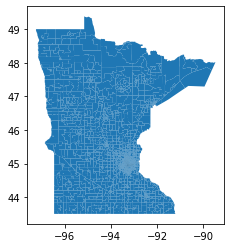

In [19]:
blockgroups_df.plot()

In [18]:
print(blockgroups_df.crs)
print(water2018.crs)

epsg:4269
epsg:26915


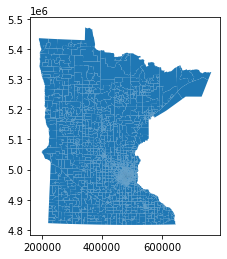

In [21]:
bg_proj = blockgroups_df.to_crs('EPSG:26915')
bg_proj.plot()

,AUID,NAME,USE_CLASS,IMP_PARAM,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,01-0001-00,Pine,"2B, 3C",Nutrients,27,001,770400,3,270017704003,Block Group 3,G5030,S,609725843,2394327,+46.3680484,-093.1181408,"POLYGON ((492805.109 5113777.267, 492795.895 5..."
1,58-0138-00,Big Pine,"2B, 3C",Hg-F,27,001,770400,3,270017704003,Block Group 3,G5030,S,609725843,2394327,+46.3680484,-093.1181408,"POLYGON ((495285.529 5115813.018, 495284.221 5..."
2,01-0014-00,Savanna,"2B, 3C",Nutrients,27,001,770100,1,270017701001,Block Group 1,G5030,S,708746119,40074485,+46.8763449,-093.2082035,"POLYGON ((486012.720 5188792.470, 486029.333 5..."
3,01-0036-00,Wakefield,"2B, 3C",Hg-F,27,001,770100,1,270017701001,Block Group 1,G5030,S,708746119,40074485,+46.8763449,-093.2082035,"POLYGON ((482121.518 5188839.830, 482142.037 5..."
4,01-0038-00,Remote,"2B, 3C",Hg-F,27,001,770100,1,270017701001,Block Group 1,G5030,S,708746119,40074485,+46.8763449,-093.2082035,"MULTIPOLYGON (((484014.618 5185869.469, 484048..."


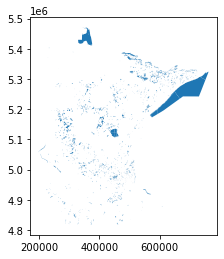

In [23]:
water2018_intersect_bg_proj = gpd.overlay(water2018, bg_proj, how='intersection')
water2018_intersect_bg_proj.plot()
water2018_intersect_bg_proj.head()